<a href="https://colab.research.google.com/github/minh071289/MachineLearning/blob/main/uet_ml_03_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch

In [22]:
import matplotlib.pyplot as plt

In [23]:
age = torch.randint(low=18, high=61, size=(20, )).float()
sal = torch.randint(low=20000, high=100000, size=(20, )).float()
x = [age, sal]

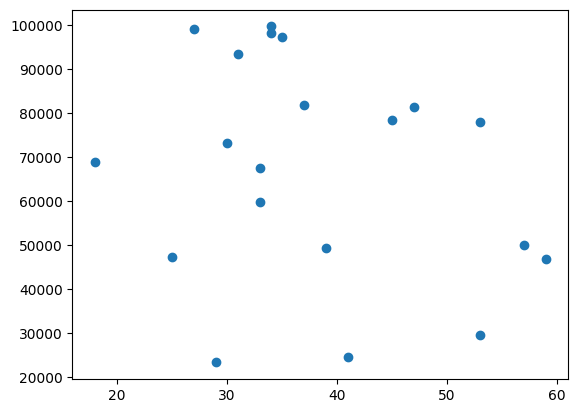

In [24]:
plt.scatter(age, sal)
plt.show()

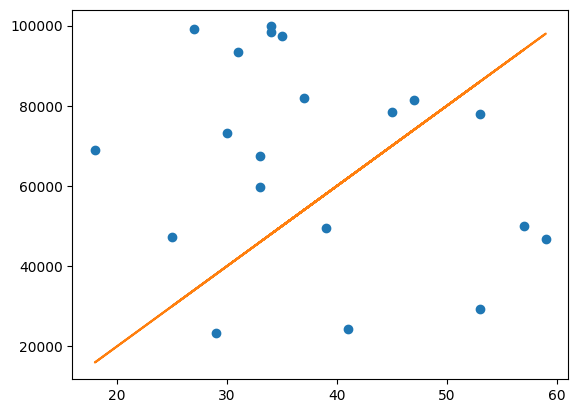

y_pos=tensor([ True, False,  True,  True,  True, False,  True, False, False,  True,
        False,  True,  True, False,  True, False,  True,  True,  True,  True])
y_neg=tensor([False,  True, False, False, False,  True, False,  True,  True, False,
         True, False, False,  True, False,  True, False, False, False, False])


In [25]:
from re import A
x00, x01 = 25, 30000
x10, x11 = 30, 40000
x0 = torch.Tensor([x00, x10])
x1 = torch.Tensor([x01, x11])
plt.scatter(age, sal)
plt.plot(x0, x1)

a = (x11 - x01) / (x10 - x00)
b = x01 - a * x00

line = a * age + b
plt.plot(age, line)
plt.show()

y = (sal - (a * age + b))

y_pos = (y > 0)
y_neg = (y < 0)

print(f"{y_pos=}")
print(f"{y_neg=}")

In [26]:
x_pos = [age[y_pos], sal[y_pos]]
x_neg = [age[y_neg], sal[y_neg]]

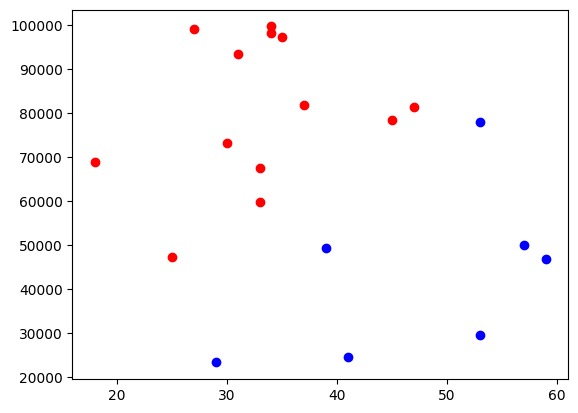

In [27]:
# plt.scatter(age, sal)
plt.scatter(x_pos[0], x_pos[1], color='red')
plt.scatter(x_neg[0], x_neg[1], color='blue')
plt.show()

In [31]:
# normalize age & sal
age = (age - age.mean()) / age.std()
sal = (sal - sal.mean()) / sal.std()

# convert to binary labels: probability of a datapoint belonging to class 1
y_true = ((sal > 0) & (age > -1) & (age < 1)).float()

# sigmoid function
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

# loss function
def loss_function(y_pred, y_true):
    return -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))

In [32]:
# initialize random weights
w0 = torch.randn(1, requires_grad=True)  # age weight
w1 = torch.randn(1, requires_grad=True)  # salary weight
b = torch.randn(1, requires_grad=True)   # bias

# training parameters
learning_rate = 0.1
T = 1000

# training process
for t in range(T):
    # compute prediction
    z = w0 * age + w1 * sal + b
    y_pred = sigmoid(z)

    # compute gradients
    grad_w0 = torch.mean((y_pred - y_true) * age)  # dL/dw0
    grad_w1 = torch.mean((y_pred - y_true) * sal)  # dL/dw1
    grad_b = torch.mean(y_pred - y_true)  # dL/db

    # update weights
    with torch.no_grad():
        w0 -= learning_rate * grad_w0
        w1 -= learning_rate * grad_w1
        b -= learning_rate * grad_b

Predicted Classes:
tensor([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1],
       dtype=torch.int32)


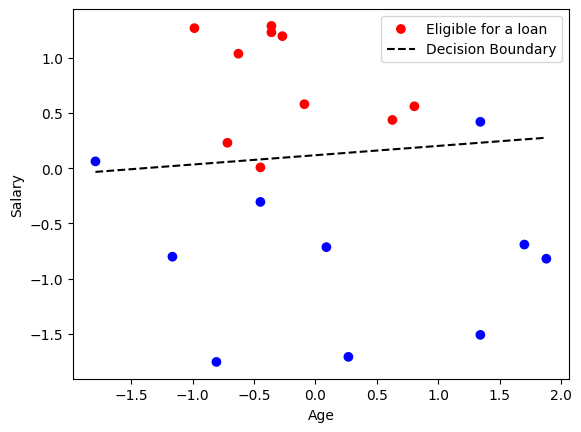

In [33]:
# prediction
with torch.no_grad():
    logits = w0 * age + w1 * sal + b
    predictions = sigmoid(logits)
    predicted_classes = (predictions > 0.5).int()

print(f"Predicted Classes:\n{predicted_classes}")

# plot decision boundary
plt.scatter(age, sal, c=y_true, cmap="bwr", label="Eligible for a loan")

# compute decision boundary (where probability = 0.5)
boundary_x = torch.linspace(age.min(), age.max(), 100)  # Age range
boundary_y = (-w0.detach() * boundary_x - b.detach()) / w1.detach()  # Solve for salary

plt.plot(boundary_x, boundary_y, 'k', linestyle='--', label="Decision Boundary")

plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()